## Introduction to linear regression

Based on the example given in http://onlinestatbook.com/2/regression/intro.html

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%pylab inline 
# allows to use everything from Numpy and Matplotlib like in Matlab, without np. and plt.

from IPython.display import Image 
# allows to show images from the web: Image(filename='hysteresis_example.png',width=400)

Populating the interactive namespace from numpy and matplotlib


/Users/alex/miniconda3/envs/taas/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Let's use some simple example of two variables, x,y
x = array([1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([1.0, 2.0, 1.30, 3.75, 2.25])

Text(0,0.5,'$y$')

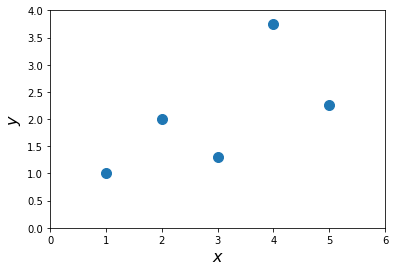

In [3]:
plot(x,y,'o',markersize=10)
xlim([0.0, 6.0])
ylim([0.0, 4.0])
xlabel('$x$',fontsize=16)
ylabel('$y$',fontsize=16)

In simple linear regression, the topic of this section, the predictions of Y when plotted as a function of X form a straight line.
Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. The black diagonal line in Figure 2 is the regression line and consists of the predicted score on Y for each possible value of X. The vertical lines from the points to the regression line represent the errors of prediction.

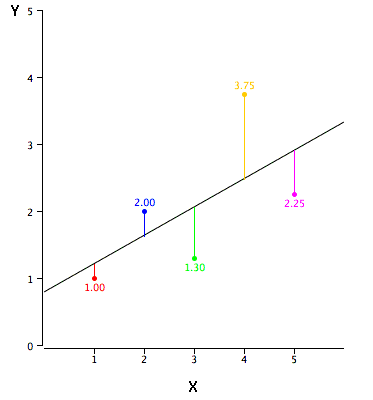

In [4]:
# Image(url='http://onlinestatbook.com/2/regression/graphics/reg_error.gif')
Image(filename='img/reg_error.png',width=400)

The error of prediction for a point is the value of the point minus the predicted value (the value on the line). Table 2 shows the predicted values (Y') and the errors of prediction (Y-Y'). For example, the first point has a Y of 1.00 and a predicted Y (called Y') of 1.21. Therefore, its error of prediction is -0.21.

The formula for the regression line is 

$$ y' = b \cdot x + a $$

Let's assume we try some values of $a,b$: 

$$ y' = 0.425\, x + 0.758 $$

In [5]:
b = 0.425
a = 0.785

ytag = x*b + a
print "y'"
print ytag
print 'original y:'
print y

y'
[1.21  1.635 2.06  2.485 2.91 ]
original y:
[1.   2.   1.3  3.75 2.25]


In [6]:
e = ytag - y
print 'Errors:'
print e

Errors:
[ 0.21  -0.365  0.76  -1.265  0.66 ]


### Computing the Regression Line

In the age of computers, the regression line is typically computed with statistical software. However, the calculations are relatively easy, and are given here for anyone who is interested. The calculations are based on the statistics shown in Table 3. $M_x$ is the mean of $X$, $M_y$ is the mean of $Y$, $S_x$ is the standard deviation of $X$, $S_y$ is the standard deviation of $Y$, and $r$ is the correlation between $X$ and $Y$.

### Formulae for standard deviations and correlation

$$ S_x = \frac{1}{N} \sum (x-\bar{x})^2 $$

$$ S_y = \frac{1}{N} \sum (y-\bar{y})^2 $$

$$ R = \frac{1}{S_x S_y} \sum (x-\bar{x})(y - \bar{y}) $$


In [7]:
Mx = mean(x)
My = mean(y)
Sx = std(x,ddof=1) # note the ddof=1 which means N-1 
Sy = std(y,ddof=1)
Sxy = corrcoef(x,y)
R = Sxy[0,1] # off-diagonal is the correlation coefficient
print '%4.3f %4.3f %4.3f %4.3f %4.3f' % (Mx,My,Sx,Sy,R)

3.000 2.060 1.581 1.072 0.627


$$ b = R \; Sy/Sx $$
$$ a = \bar{y} - b \bar{x} $$

In [8]:
b = R*Sy/Sx; print 'b = %4.3f' % b
a = My - b*Mx; print 'a = %4.3f'% a

b = 0.425
a = 0.785


## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [9]:
from math import sqrt
def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    if len(X) != len(Y):  raise ValueError, 'unequal length'
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in map(None, X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    a, b = (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
    meanerror = residual = 0.0
    for x, y in map(None, X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
    RR = 1 - residual/meanerror
    ss = residual / (N-2)
    Var_a, Var_b = ss * N / det, ss * Sxx / det
    # print "y=ax+b"
    # print "N= %d" % N
    # print "a= %g \\pm t_{%d;\\alpha/2} %g" % (a, N-2, sqrt(Var_a))
    # print "b= %g \\pm t_{%d;\\alpha/2} %g" % (b, N-2, sqrt(Var_b))
    # print "R^2= %g" % RR
    # print "s^2= %g" % ss
    return a, b, RR

In [10]:
a,b, RR = linreg(x,y)
print a, b

0.425 0.785


### Standardized Variables

The regression equation is simpler if variables are **standardized** so that their means are equal to 0 and standard deviations are equal to 1, for then $b = r$ and $a = 0$. This makes the regression line:

$$ Z_y = (R)(Z_x) $$

where $Z_y = y - \bar{y}$, $Z_x = x - \bar{x}$, $R$ is the correlation, Note that the slope of the regression equation for standardized variables is $R$.

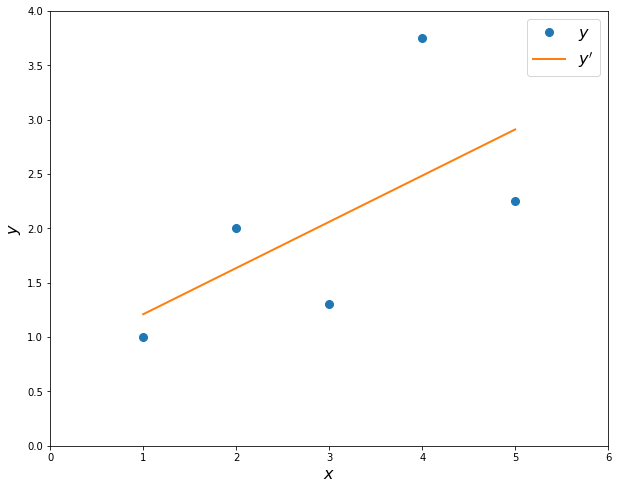

In [11]:
figure(figsize=(10,8))
plot(x,y,'o',markersize=8)
xlim([0.0, 6.0])
ylim([0.0, 4.0])
xlabel('$x$',fontsize=16)
ylabel('$y$',fontsize=16)
plot(x,ytag,'-',lw=2)
legend((r'$y$',r"$y'$"),fontsize=16)

# Estimate $a,b$ and also $\Delta a$ and $\Delta b$

We start with the list of $N$ points $x_i,y_i$ and we assume that the errors in $\Delta x \ll \Delta y$. Our goal is to minimize the sum of all the deviations, $d_i = y_i - (a x_i + b)$

For that, we shall minimize the sum of square errors: $$ S^2 = \sum\limits_{i=1}^{N} d_i^2 = \sum\limits_{i=1}^{N} \left( y_i - a x_i - b \right)^2$$

In order to find those we need to derive $S^2$ by $b$ and by $a$ and solving for zero we get two equations that provide us the minimum. The equations we get are: $$a = \frac{1}{A}\left(N S_{xy} - S_y S_x \right) $$ $$b = \frac{1}{A} \left(S_{xx} S_{y} - S_{xy} S_x \right) $$ 
where
$$S_x = \sum\limits_{i=1}^{N} x_i $$
$$S_y = \sum\limits_{i=1}^{N} y_i $$
$$S_{xx} = \sum\limits_{i=1}^{N} x_i^2 $$
$$S_{yy} = \sum\limits_{i=1}^{N} y_i^2 $$
$$S_{xy} = \sum\limits_{i=1}^{N} x_i y_i $$
$$A \equiv N S_{xx} - S_x^2 $$


Then we can measure both $a$ and $\Delta a$: $$ \Delta a = \sigma_y \sqrt{N/A} $$ $$\Delta b = \sigma_y \sqrt{S_{xx}/A}$$

and the error is $$\Delta y = \frac{1}{N} \sum\limits_{i=1}^{N} \Delta y_i $$ and the deviation of the errors is 
$$ \sigma_y = \sqrt{\frac{1}{N-2}\sum d_i^2} = $$ 
$$ = \sqrt{\frac{1}{N-2}\left(S_{yy} + a^2 S_{xx} +Nb^2 - 2aS_{xy} -2bS_{y} + 2abS_x \right) }$$

### Example

In [12]:
import numpy as np
x = np.arange(2.,11.)
y = np.array([14.5, 16.0, 18.5, 20.0, 22.5, 24.5, 26.0, 27.0, 29.0])
print x,y

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.] [14.5 16.  18.5 20.  22.5 24.5 26.  27.  29. ]


### let's assume $\Delta x = 0$, $\Delta y = 0.2$

In [13]:


Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Syy = np.sum(y**2)
Sxy = np.sum(x*y)
N = x.size
A = N*Sxx - Sx**2

In [14]:
a = 1./A*(N*Sxy - Sy*Sx)
b = 1./A*(Sxx*Sy - Sxy*Sx)
print 'a,b = %3.2f,%3.2f' % (a,b)

a,b = 1.84,10.95


In [15]:
d = (y - (a*x + b))

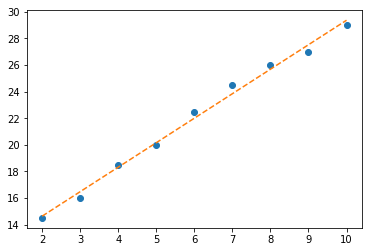

In [16]:
pl.plot(x,y,'o',x,a*x+b,'--')

In [17]:
sigma = np.sqrt((1./(N-2)*np.sum(d**2)))
print 'sigma_y = %4.3f' % sigma

sigma_y = 0.462


In [18]:
delta_y = 0.2
delta_a = sigma * np.sqrt(N/A); print '\Delta a = %4.3f' % delta_a
delta_b = sigma * np.sqrt(Sxx/A); print '\Delta b = %4.3f' % delta_b

\Delta a = 0.060
\Delta b = 0.390


### Final result is:

$$ a = 1.84 \pm 0.06 $$ 
$$ b = 10.95 \pm 0.46 $$